# Chapter 6. 결정 트리
- 분류와 회귀 작업, 그리고 다중출력 작업도 가능한 다재다능한 머신러닝 알고리즘
- 매우 복잡한 데이터셋도 학습할 수 있는 강력한 알고리즘
- 7장의 랜덤 포레스트의 기본 구성 요소

## 6-1. 결정 트리 학습과 시각화

In [1]:
# 붓꽃 데이터셋에 DecisionTreeClassifier 학습시키기
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # 꽃잎 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

- `export_graphviz()` 함수를 사용하여 그래프 정의를 `iris_tree.dot` 파일로 출력하여 훈련된 결정트리 시각화 가능

In [2]:
# 결정 트리 시각화하기
from sklearn.tree import export_graphviz
export_graphviz(tree_clf,
               out_file='iris_tree.out',
               feature_names=iris.feature_names[2:],
               class_names=iris.target_names,
               rounded=True,
               filled=True
            )

- `.dot` 파일을 Graphviz 패키지에 있는 dot 명령줄 도구로 PDF나 PNG같은 포맷으로 변경 가능

- **NOTE** Sklearn 0.21부터는 파일을 만들지 않고 바로 트리를 그릴 수 있는 plot_tree() 함수 추가 

[Text(0.4, 0.8333333333333334, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

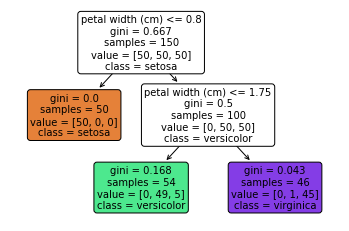

In [4]:
# plot_tree
from sklearn.tree import plot_tree
plot_tree(tree_clf,
          feature_names=iris.feature_names[2:],
          class_names=iris.target_names,
          rounded=True,
          filled=True
        )

## 6.2 예측하기
- 새로 발견한 붓꽃의 품종을 분류하려 한다고 가정 
    * Root Node에서 시작
        - 꽃잎의 길이가 0.8cm보다 짧은지 검사
            - 짧다면 Root Node의 왼쪽 Child Node로 이동
                * 왼쪽 Child Node는 Child가 없는 Leaf Node이므로 더 이상 추가적인 검사 없이 현재 클래스 (Setosa)로 분류함
            - 길다면 Root Node의 오른쪽 Child Node로 이동
                * 오른쪽 Child Node는 Leaf Node가 아니므로 추가적인 검사 실행
                    - 꽃잎의 길이가 1.75cm보다 작은지 검사
                        * 짧다면 Versicolor로 분류
                        * 길다면 Virginica로 분류

- **NOTE** 결정 트리의 장점 -> 데이터 전처리가 거의 필요하지 않음
    * 특성의 스케일을 맞추거나 평균을 원점에 맞추는 작업이 필요하지 않음

- 노드의 속성
    1. sample
        * 얼마나 많은 훈련 샘플이 적용되어 있는지 나타낸 것
            - 100개의 훈련 샘플은 0.8보다 김 (오른쪽)
            - 50개의 훈련 샘플은 0.8보다 짧음 (왼쪽)
    2. value
        * 노드에서 각 클래스에 얼마나 많은 샘플들이 있는지 나타냄
            - 맨 오른쪽 아래 노드
                * Iris-Senota 0개
                * Iris-Versicolor 1개
                * Iris-Virginica 45개
    3. gini
       * 불순도 (Impurity)를 측정
           - 한 노드의 모든 샘플이 같은 클래스에 속할 경우 순수 (gini=0)
               * 예 : 맨 왼쪽 노드 (Iris-Setosa 샘플만 가지고 있음)
       * gini 점수 $G_i$를 계산하는 방법
           - $G_i = 1 - \sum_{k=1}^n p_{i, k^2}$
               * $p_{i, k} - i번째 Node에 있는 훈련 샘플 중 클래스 k에 속한 샘플 비율 
 
 
- **NOTE** Sklearn은 **이진 트리**만 만드는 **CART 알고리즘**을 사용하기 때문에 Leaf Node 외의 모든 Node는 자식 노드를 2개씩 가짐
    * 그러나 ID3 같은 알고리즘은 둘 이상의 자식 노드를 가지는 결정 트리를 만들 수 있음


- [그림 6-2]는 결정 트리의 결정 경계를 보여줌
    * 굵은 수직선 : Root Node의 결정 경계
    * 왼쪽 영역 : 순수 노드 (Iris-Setosa)만 있어 더 이상 나눌 수 없음
    * 오른쪽 영역 : 순수 노드가 아니므로 깊이 1의 오른쪽 노드는 꽃잎 너비 1.75에서 나뉘어짐
    * max_depth를 2로 설정했기 때문에 결정트리가 더 이상 분할되지 않음
        - 3으로 설정할 경우? 깊이 2의 두 Node가 각각 결정 경계를 추가로 만듬 (점선)
 
 
- 모델 해석 : 화이트박스와 블랙박스
    * 화이트박스 : 직관적이고 결정 방식을 이해하기 쉬운 모델
        - 예 : 결정 트리
    * 블랙박스 : 성능이 뛰어나고 예측을 만드는 연산 과정을 쉽게 확인 가능하지만 왜 그런 예측을 만드는지 쉽게 설명하기 어려움
        - 예 : 랜덤 포레스트, 신경망

## 6.3 클래스 확률 추정
- 결정 트리는 한 샘플이 특정 클래스 k에 속할 확률을 추정할 수 있음
    1. 샘플에 대해 Leaf Node를 찾기 위해 트리를 탐색
    2. 그 Node에 있는 클래스 k의 훈련 샘플의 비율 반환
    * 예 : 길이가 5cm이고 너비가 1.5cm인 꽃잎을 발견했다고 가정
        - 이에 해당하는 리프 노드는 깊이 2에서 왼쪽 노드
            * 결정 트리는 이에 해당하는 확률 출력

In [5]:
# 클래스 하나 예측해보기 (높은 확률을 가지는 클래스를 출력하게 됨)
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [6]:
tree_clf.predict([[5, 1.5]])

array([1])

## 6.4 CART 훈련 알고리즘
- Sklearn에서 결정 트리를 훈련시키기 위해 사용하는 알고리즘
- 훈련 세트를 하나의 특성 k와 임곗값 $t_k$를 사용해 두 개의 서브셋으로 나눔
    * 예 : 꽃잎의 길이 <= 2.45
- k와 $t_k$ 선택 방법
    * (크기에 따른 가중치가 적용된) 가장 순수한 서브셋으로 나눌 수 있는 (k, $t_k$) 짝을 찾음
- 이 알고리즘이 최소화해야하는 비용 함수
    * $J(k, t_k) = {m_{left}\over m} G_{left} + {m_{right}\over m}G_{right}$
        - $G_{left/right}$ - 왼쪽 / 오른쪽 서브셋의 불순도
        - $m_{left/right}$ - 왼쪽 / 오른쪽 서브셋의 샘플 수
- 알고리즘이 훈련 세트를 성공적으로 둘로 나누었다면 같은 방식으로 서브셋을 또 나누고, 서브셋은 또 다른 서브셋으로 나눠지는 식으로 반복됨
    * `max_depth`로 정의된 최대 깊이가 되면 중지하거나 불순도를 줄이는 분할을 찾을 수 없을때 중지함
- **CAUTION** CART 알고리즘은 Greedy Algorithm임
    * 맨 위 Root Node에서 최적의 분할을 찾으며 이어지는 각 단계에서 이 과정을 반복
    * 최적의 트리를 찾는 것은 NP-Complete 문제로 알려짐

## 6.5 계산 복잡도
- 예측을 하기 위해서는 Root Node부터 Leaf Node까지 탐색해야 함
- 일반적으로 결정 트리는 거의 균형을 이룸
    * 탐색을 위해서 약 $O(log_2(m))$개의 Node를 거쳐야 함
- 각 노드는 하나의 특성값만 확인하기 때문에 예측에 필요한 전체 복잡도는 특성 수와 무관하게 $O(log_2(m))$
    * 큰 훈련 세트를 다룰 때도 예측 속도가 매우 빠름
- 훈련 알고리즘은 각 노드에서 모든 훈련 샘플의 모든 (또는 max_features가 지정되었다면 그보다 적은) 특성 비교
    * 각 노드에서 모든 샘플의 모든 특성을 비교하면 훈련 복잡도는 $O(n\times m log_2(m))$이 됨
    * 훈련 세트가 작을 경우 Sklearn에서 미리 데이터를 정렬 (`presort=True`)하여 훈련 속도를 높일 수 있음
        - 그러나 훈련 세트가 클 경우 속도가 많이 느려짐

## 6.6 지니 불순도 또는 엔트로피?
- 기본적으로 gini 불순도가 사용되지만 `criterion` 매개변수를 `"entropy"`로 지정하여 **엔트로피 불순도** 사용 가능
    * 엔트로피 : 분자의 무질서함을 측정하는 열역학의 개념
        - 분자가 안정되고 질서 정연한 경우 엔트로피가 0에 가까움
- 어떤 세트가 한 클래스의 샘플만 담고 있다면 엔트로피가 0
- 다음 식은 i번째 노드의 엔트로피 정의를 보여줌
    * ${H_i} = - \sum_{{k=1}_{p_{i, k}} \neq 0}^n p_{i, k} log_2(P_{i, k})$
    * 위에서 보았던 깊이 2의 왼쪽 노드의 엔트로피
        * $-{49 \over 54}log_2({49 \over 54})-{5 \over 54}log_2({5 \over 54}) \approx 0.445$
- gini 불순도와 엔트로피 중 어떤 것을 사용해야 하는가?
    * 실제로는 큰 차이가 존재하지 않음 (비슷한 트리를 만들어냄)
    * 지니 불순도가 계산이 더 빠르기 때문에 기본값으로 좋음
    * 그러나 다른 트리가 만들어지는 경우도 존재
        - 지니 불순도가 **가장 빈도 높은 클래스를 한 쪽 Branch로 고립하는 경향이 있음**
        - 엔트로피는 **조금 더 균형 잡힌 트리**를 만듬

## 6.7 규제 매개변수
- 결정트리는 훈련 데이터에 대한 제약 사항이 거의 없음
    * 선형 모델은 데이터가 선형일 것이라고 가정
- 제한을 두지 않으면 트리가 훈련 데이터에 아주 가깝게 맞추려고 해서 대부분 과대적합되기 쉬움
- 결정 트리는 모델 파라미터가 전혀 없는 것이 아니라 **훈련되기 전에 파라미터 수가 결정되지 않는데**, 이런 모델을 **비파라미터 모델**이라고 부름
    * 모델 구조가 데이터에 맞춰져서 고정되지 않고 자유로움
    * 선형 모델과 같은 **파라미터 모델**은 미리 정의된 모델 파라미터 수를 가지므로 자유도가 제한되고 과대적합 위험이 줄어듬
        - 과소적합 위험은 커짐


- 훈련 데이터에 대한 과대 적합을 피하기 위해서는?
    * 결정 트리의 자유도를 제한할 필요가 있음 (**규제**)
- 규제 매개변수는 사용하는 알고리즘마다 다르지만 보통 적어도 결정 트리의 **최대 깊이**는 제어할 수 있음
    * Sklearn에서는 `max_depth` 매개변수로 조절
        - 기본값 : 제한이 없는 것을 의미하는 None
    * 최대 깊이를 줄이면 모델을 규제하게 되고 과대 적합의 위험이 감소


- `DecisionTreeClassifier`에는 비슷하게 결정 트리의 현태를 제한하는 다른 매개변수가 존재
    * `min_samples_split` : 분할되기 위해 노드가 가져야 하는 최소 샘플 수
    * `min_samples_leaf` : 리프 노드가 가지고 있어야 할 최소 샘플 수
    * `min_weight_fraction_leaf` : `min_samples_leaf`와 같지만 가중치가 부여된 전체 샘플 수에서의 비율
    * `max_leaf_nodes` : 리프 노드의 최대 수
    * `max_features` : 각 노드에서 분할에 사용될 특성의 최대 수
- `min_`이나 `max_`로 시작하는 매개변수를 감소시키면 모델의 규제가 커짐


- [그림 6-3]은 moons 데이터셋에 훈련시킨 두 개의 결정 트리를 보여줌
    * 왼쪽 결정 트리 : 기본 매개변수를 사용하여 훈련 (규제 없음)
        - 과대적합 됨
    * 오른쪽 결정 트리 : `min_sample_leaf=4`로 지정하여 훈련
        - 일반화 성능이 좋을 것으로 보임


- **NOTE** 제한 없이 결정 트리를 훈련시키고 불필요한 노드를 `가지치기 (Pruning (제거))` 하는 알고리즘도 존재
    * 순도를 높이는 것이 통계적으로 큰 효과가 없다면 리프 노드 바로 위의 노드는 불필요할 수 있음
        - 대표적으로 $x^2$ 검정 (Chi-Squared Test)같은 통계적 검정을 사용해 우연히 향상된 것인지 추정
            * 이 확률을 $p-값$이라고 부르며 어떤 임곗값 (하이퍼파라미터로 조정되나 통상 5%)보다 높으면 불필요한 노드로 간주하여 삭제
    * 가지치기는 불필요한 노드가 모두 없어질 때까지 계속됨

## 6.8 회귀
- 결정 트리는 회귀 문제에서도 사용 가능

[Text(0.5, 0.8333333333333334, 'x1 <= 0.197\nsquared_error = 0.098\nsamples = 200\nvalue = 0.354'),
 Text(0.25, 0.5, 'x1 <= 0.092\nsquared_error = 0.038\nsamples = 44\nvalue = 0.689'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.018\nsamples = 20\nvalue = 0.854'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.013\nsamples = 24\nvalue = 0.552'),
 Text(0.75, 0.5, 'x1 <= 0.772\nsquared_error = 0.074\nsamples = 156\nvalue = 0.259'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.015\nsamples = 110\nvalue = 0.111'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.036\nsamples = 46\nvalue = 0.615')]

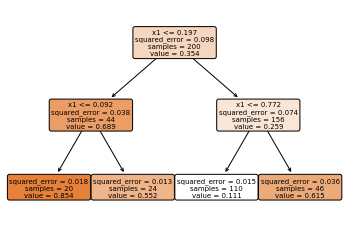

In [10]:
# 2차식으로 만든 데이터셋 + 잡음 (from Book Git Repository)
import numpy as np
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

# Sklearn의 `DecisionTreeRegressor`를 사용해 잡음이 섞이 2차 함수 형태의 데이터셋에서 `max_depth=2` 설정으로 회귀 트리를 만들기
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

# plot_tree
from sklearn.tree import plot_tree
plot_tree(tree_reg,
          feature_names=["x1"],
          rounded=True,
          filled=True
        )

- 앞서 만든 분류 트리와의 주요 차이점
    * 각 노드에서 클래스를 예측하는 대신 **어떤 값**을 예측한다는 점
        - 예 : $x_1=0.6$인 샘플의 타깃값을 예측한다고 가정
            * 루트 노드부터 시작하여 트리를 순회하면 $value=0.111$인 리프 노드에 도달하게 됨
            * 이 리프 노드에 있는 **110개 훈련 샘플의 평균 타깃값**이 **예측값**이 됨
                - 이 예측값을 사용해 110개 샘플에 대한 평균 제곱 오차 (MSE)를 계산하면 0.015
- 이 모델의 예측은 [그림 6-5]의 왼쪽에 나타남
    * `max_depth=3`으로 설정하면 오른쪽 그래프와 같은 예측을 얻게 됨
- 각 영역의 예측 값은 항상 그 영역에 있는 타깃값의 평균이 됨
    * 알고리즘은 예측값과 가능한 한 많은 샘플이 가까이 있도록 영역을 분할
 

- CART 알고리즘은 훈련 세트의 불순도를 최소화하는 방향으로 분할하는 대신 **MSE를 최소화하도록 분할하는 것**을 제외하고는 앞서 설명한 것과 거의 비슷하게 작동
    * 회귀를 위한 CART 비용 함수 : $J(k, t_k)={m_{left}\over{m}}MSE_{left} + {{m_{right}}\over{m}}MSE_{right}$
        - $MSE_{node} = {1 \over {m_{node}}} \sum_{i \in node} (\hat y_{node} - y^{(i)})^2$
        - $\hat y_{node} = {1 \over {m_{node}}} \sum_{i \in node} y^{(i)}$
 

- 회귀 작업에서도 결정 트리가 과대적합되기 쉬움
    * 규제가 없다면 [그림 6-6]의 왼쪽과 같이 과대적합됨
    * `min_sample_leaf=10`으로 지정하면 오른쪽과 같이 훨씬 그럴싸한 모델을 만들 수 있음

## 6.9 불안정성
- 결정 트리는 이해하기 쉬우며, 사용하기 편하고, 여러 용도로 사용할 수 있으며, 성능도 뛰어남
    * 그러나 몇 가지의 제한 사항 존재
- 제한 사항
    1. 결정 트리는 계단 모양의 결정 경계를 만듬 (모든 분할은 축에 수직)
        - 이로 인해 훈련 세트의 회전에 민감함
        - 해결 방법 : 훈련 데이터를 더 좋은 방향으로 회전시키는 PCA 기법 (8장) 사용
    2. 훈련 데이터에 있는 작은 변화에도 매우 민감함
        - Sklearn에서 `random_state` 매개변수를 지정하지 않으면 가은 훈련 데이터에서도 다른 모델을 얻게될 수 있음
            * 사용하는 알고리즘이 확률적이기 때문